In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from joblib import dump

In [2]:
# Load the dataset
data = pd.read_csv('dataset.csv')

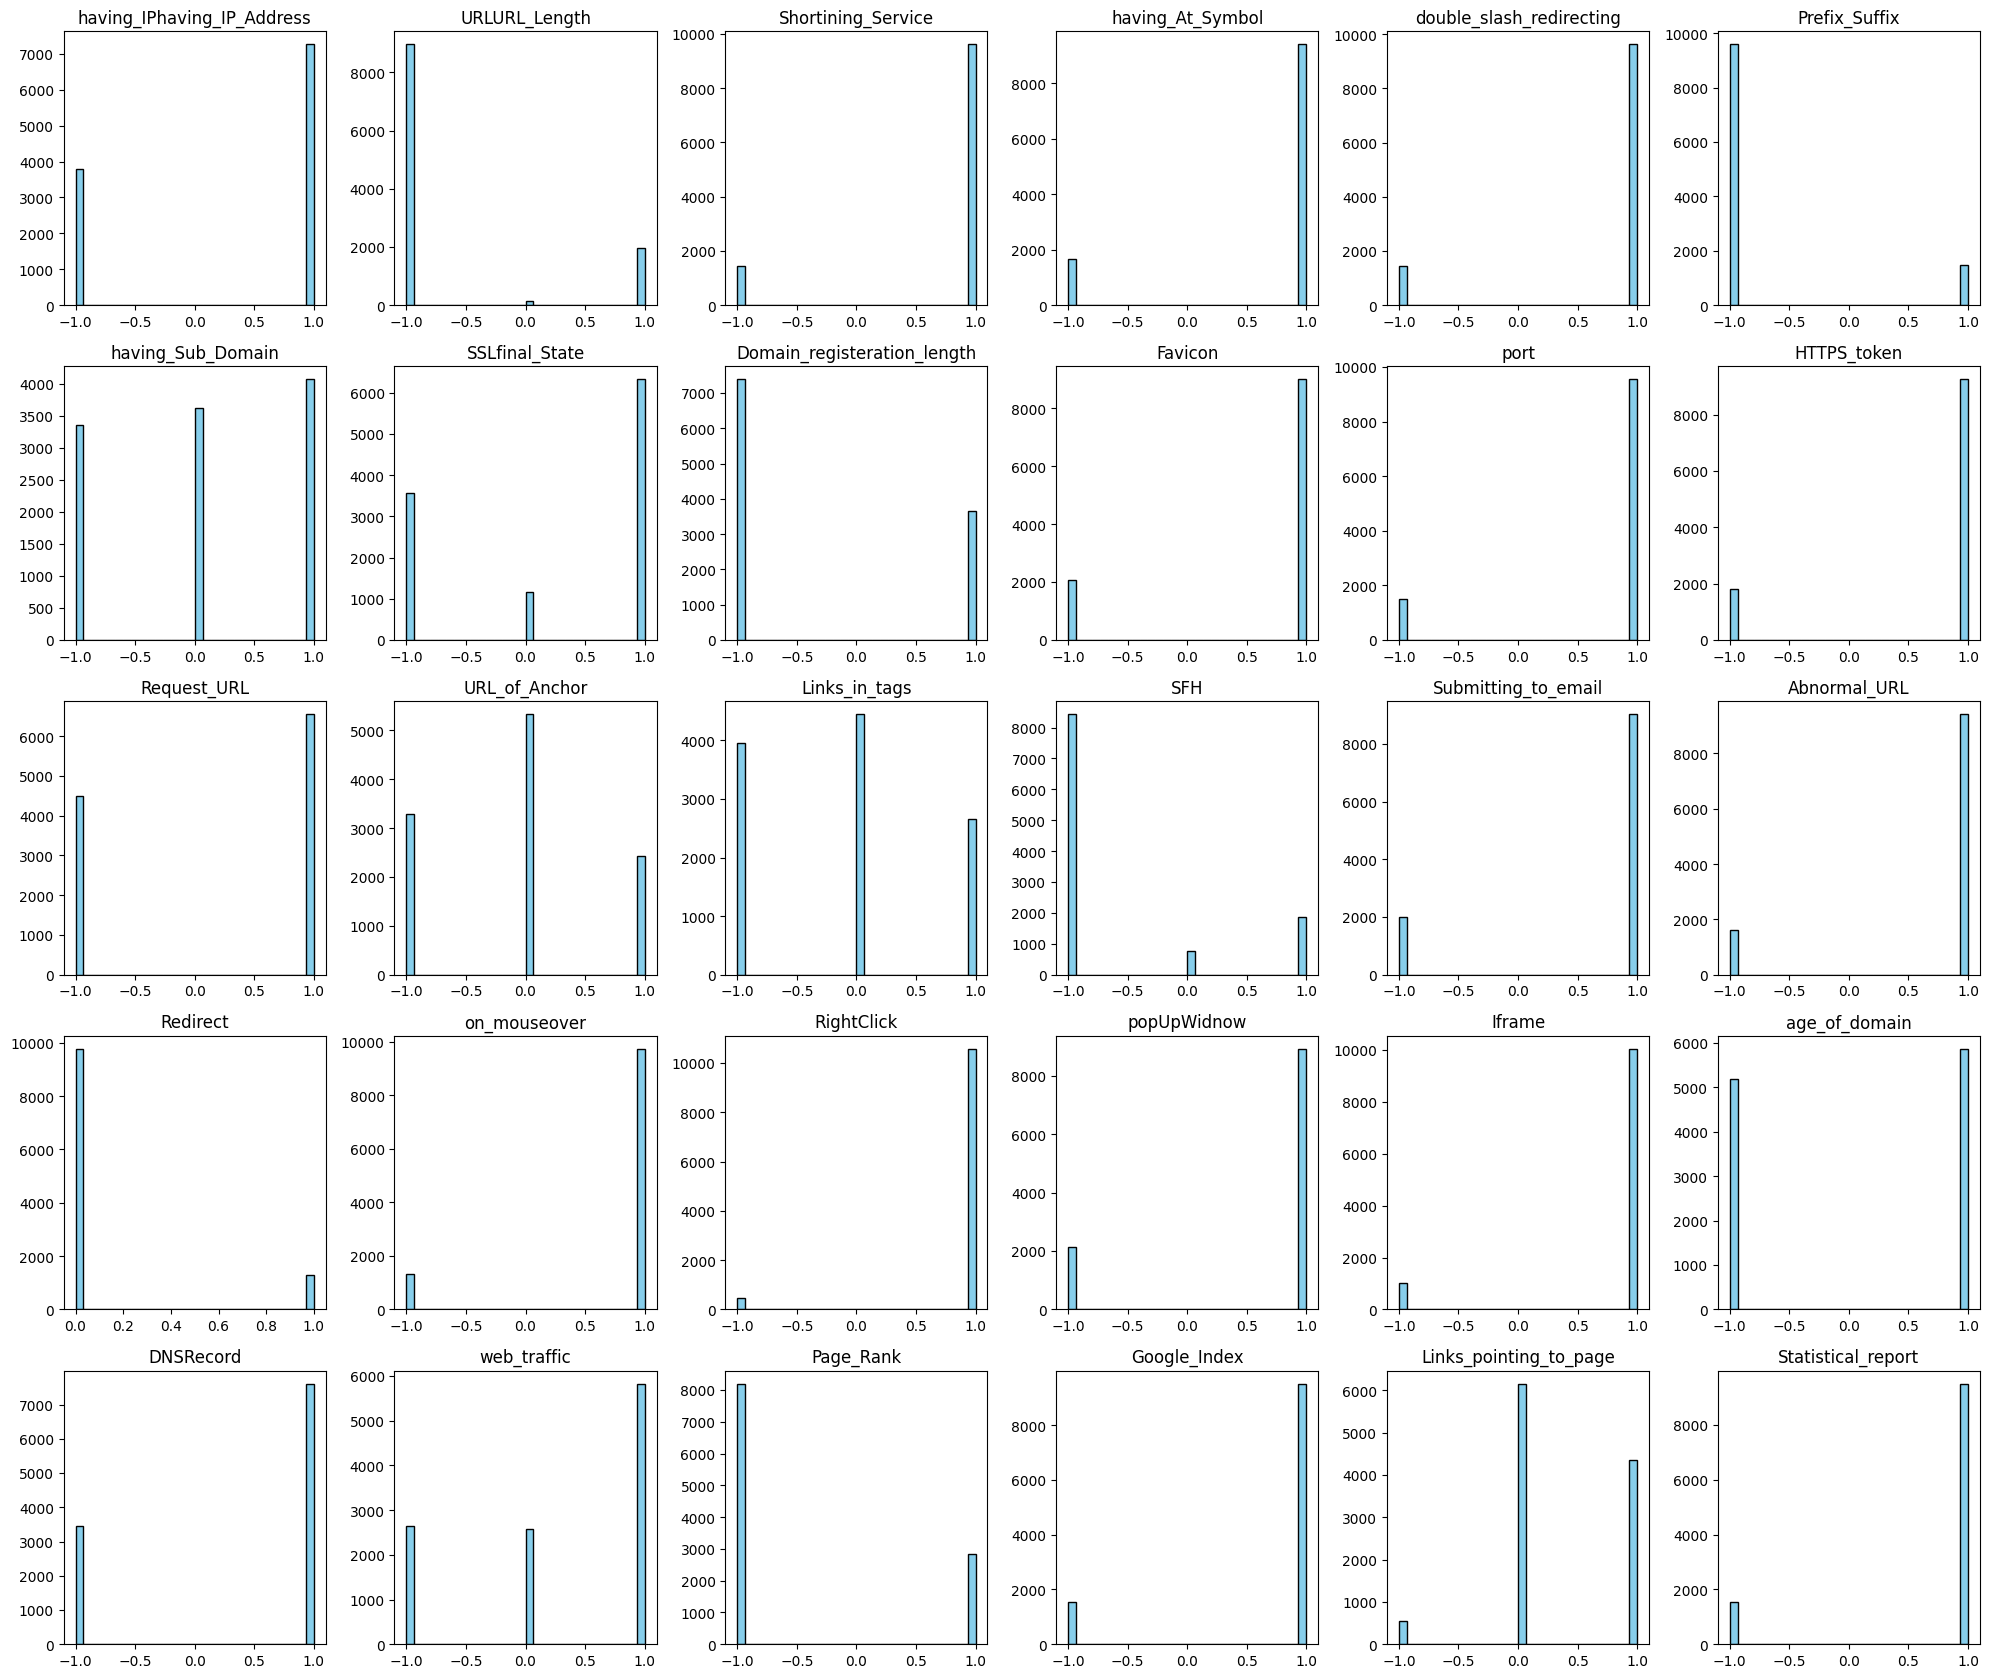

In [3]:
# EDA: Histograms for all features
plt.figure(figsize=(20, 20))
for i, column in enumerate(data.drop(['index', 'Result'], axis=1).columns):
    plt.subplot(6, 6, i+1)
    data[column].hist(grid=False, bins=30, color='skyblue', edgecolor='black', rwidth=1)
    plt.title(column)
    plt.tight_layout()
plt.show()

In [4]:
# EDA: Unique elements in all features and number of samples
num_samples = len(data)
unique_elements = data.nunique()

# Print the total number of samples
print(f"Total number of samples: {num_samples}\n")

# Print the count of unique elements for each feature
print("Count of unique elements for each feature:\n")
for feature, count in unique_elements.items():
    print(f"{feature}: {count}")

Total number of samples: 11055

Count of unique elements for each feature:

index: 11055
having_IPhaving_IP_Address: 2
URLURL_Length: 3
Shortining_Service: 2
having_At_Symbol: 2
double_slash_redirecting: 2
Prefix_Suffix: 2
having_Sub_Domain: 3
SSLfinal_State: 3
Domain_registeration_length: 2
Favicon: 2
port: 2
HTTPS_token: 2
Request_URL: 2
URL_of_Anchor: 3
Links_in_tags: 3
SFH: 3
Submitting_to_email: 2
Abnormal_URL: 2
Redirect: 2
on_mouseover: 2
RightClick: 2
popUpWidnow: 2
Iframe: 2
age_of_domain: 2
DNSRecord: 2
web_traffic: 3
Page_Rank: 2
Google_Index: 2
Links_pointing_to_page: 3
Statistical_report: 2
Result: 2


In [5]:
# Correlation of Features
correlation_matrix = data.drop('index', axis=1).corr()

data.corr()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


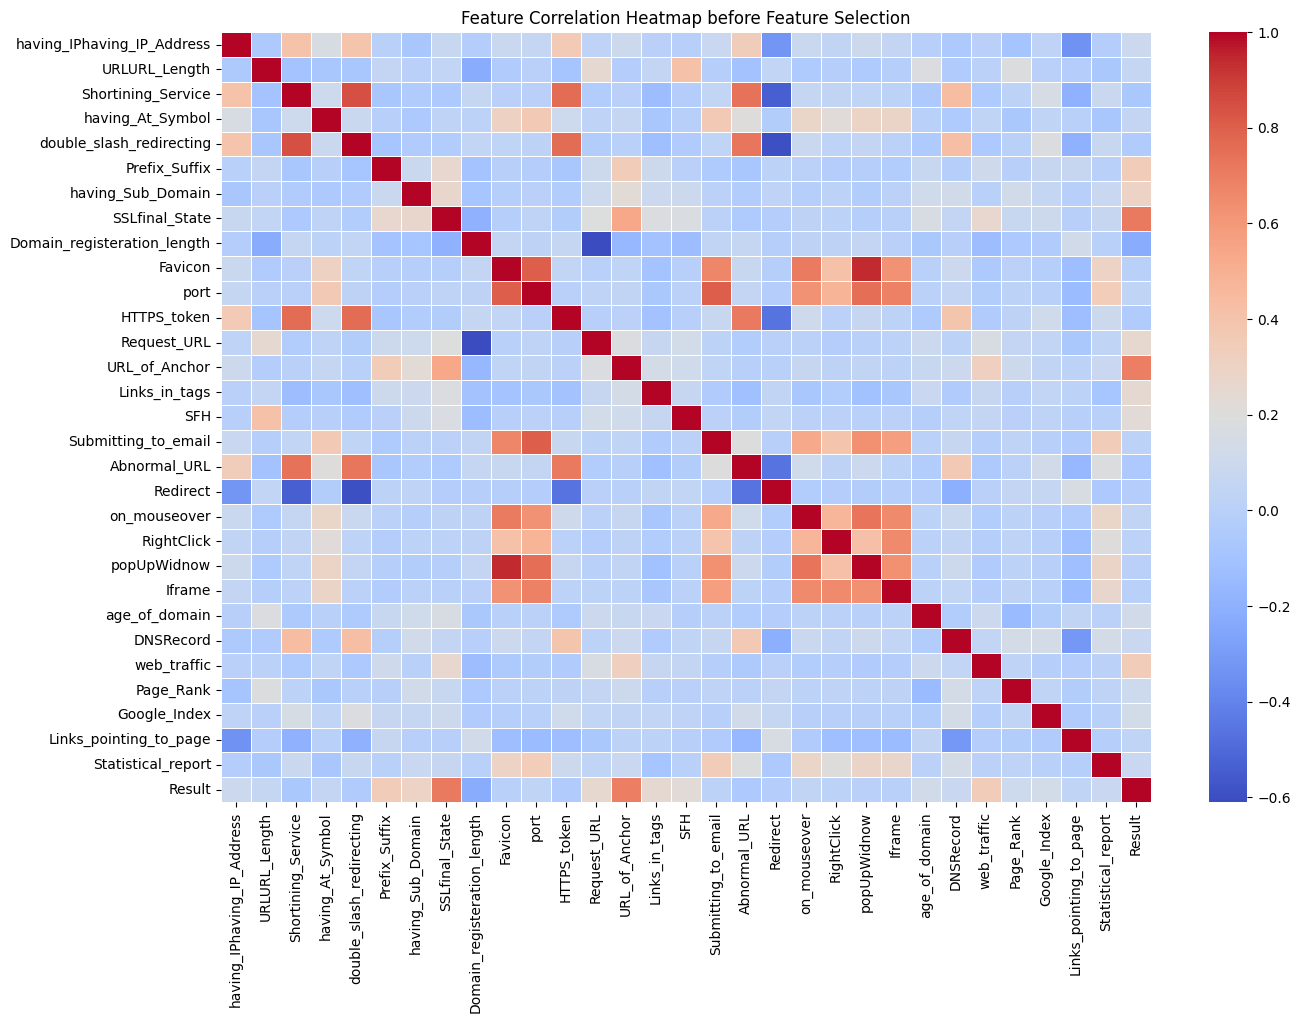

In [6]:
# Heatmap for feature correlation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=.5)
plt.title('Feature Correlation Heatmap before Feature Selection')
plt.show()

In [7]:
# Feature Selection based on correlation
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]
data_cleaned = data.drop(to_drop, axis=1)

<ipython-input-7-07adf04a28af>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [8]:
# Splitting the dataset into training and validation sets
X = data_cleaned.drop(['index', 'Result'], axis=1)
y = data_cleaned['Result']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Building a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Save the trained model as a .sav file
dump(clf, 'finalized_model.sav')

['finalized_model.sav']

In [11]:
# ROC curve for model diagnostic
y_prob = clf.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_prob, pos_label=-1)
roc_auc = auc(fpr, tpr)

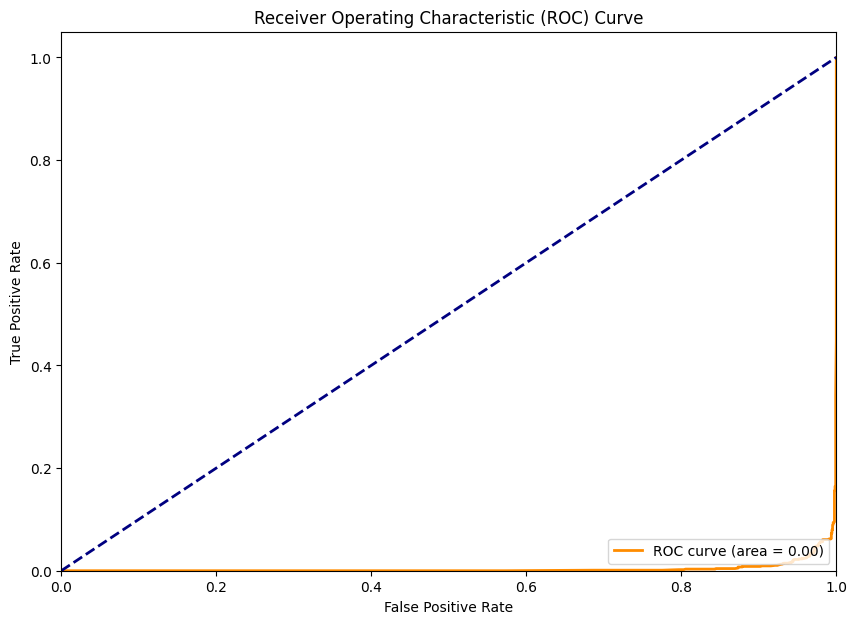

In [12]:
# Plotting ROC curve
plt.figure(figsize=(10, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
# 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
avg_cv_score = cv_scores.mean()

In [14]:
# Predictions on the validation set and compute accuracy and F1-score
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, pos_label=-1)  # considering phishing (-1) as the positive class

In [15]:
# Print accuracy and F1-score
print("Accuracy on the validation set:", accuracy)
print("F1-Score on the validation set:", f1)

Accuracy on the validation set: 0.966078697421981
F1-Score on the validation set: 0.9604221635883905
